In [1]:
from DeepStorm.Model import Model
from DeepStorm.Layers.Initializers import Xavier, He, UniformRandom, Constant
from DeepStorm.Layers.Conv import Conv2d
from DeepStorm.Layers.BatchNormalization import BatchNorm2d
from DeepStorm.Layers.Pooling import MaxPool2d
from DeepStorm.Layers.Flatten import Flatten
from DeepStorm.Layers.Dropout import Dropout
from DeepStorm.Layers.FullyConnected import Linear
from DeepStorm.Layers.ReLU import ReLU
from DeepStorm.Layers.SoftMax import SoftMax
from DeepStorm.Optimization.Loss import CrossEntropyLoss
from DeepStorm.Optimization.Optimizers import Adam, SgdWithMomentum, Sgd

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

## Mnist data example

In [2]:
input_folder_path = "Data/"
train_df = pd.read_csv(f"{input_folder_path}train.csv")[:]
test_df = pd.read_csv(f"{input_folder_path}test.csv")

train_labels = train_df['label'].values
train_images = (train_df.iloc[:, 1:].values).astype('float32')
test_images = (test_df.iloc[:, :].values).astype('float32')

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                      stratify=train_labels, random_state=123,
                                                                      test_size=0.20)
train_images = train_images.reshape(train_images.shape[0], 28 *28)
val_images = val_images.reshape(val_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)

train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

classes = 10

train_labels = train_labels.reshape(-1)
train_labels = np.eye(classes)[train_labels]
val_labels = val_labels.reshape(-1)
val_labels = np.eye(classes)[val_labels]

In [3]:
layers = [
    Linear(in_features=28*28, out_features=256),
    ReLU(),
    Linear(in_features=256, out_features=128),
    ReLU(),
    Linear(in_features=128, out_features=64),
    ReLU(),
    Linear(in_features=64, out_features=10),
    SoftMax(),
]

model = Model(layers)

In [4]:
batch_size = 32
model.compile(optimizer=Adam(learning_rate=5e-3, mu=0.98, rho=0.999), loss=CrossEntropyLoss(),
              batch_size=batch_size, metrics=['accuracy'])

In [5]:
epochs = 20
history = model.fit(x_train=train_images, y_train=train_labels,
                    x_val=val_images, y_val=val_labels, epochs=epochs)

Epoch 1: 


Train loss: 9.65
Train accuracy: 0.9094642857142857


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (262,) + inhomogeneous part.

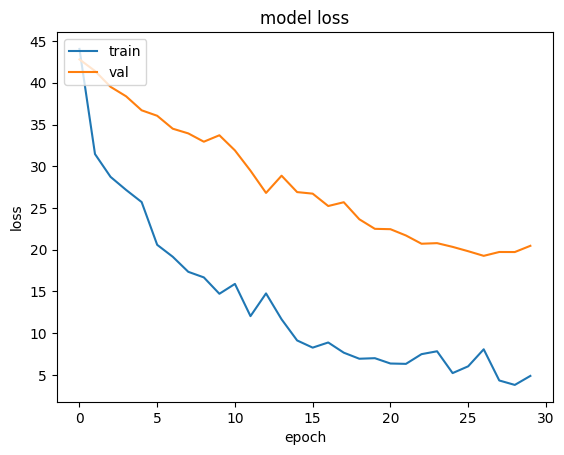

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

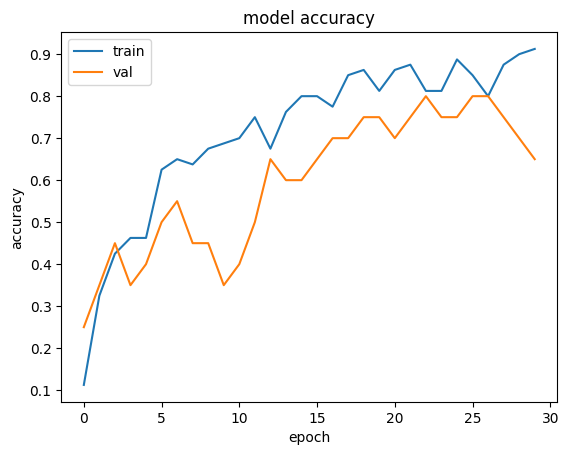

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Example